# Regressão logística

Determinar se uma pessoa terá doença no coração num intervalo de dez anos, baseado no seu histórico médico, condições médicas atuais e comportamento

Dataset obtido no Kaggle (https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('framingham.csv')

In [3]:
dados.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Informações:

male: 1 -> homem, 0 -> mulher (variável categórica)

age: idade (variável contínua)

educação: nível educacional (variável categórica)

currentSmoker: 1 -> fumante, 0 -> não fumante (variável categórica)

cigsPerDay: quantidade de cigarros por dia (variável contínua)

BPMeds: 1 -> paciente toma medicamente para pressão, 0- > não toma medicamento (variável categórica)

prevalentStroke: 1 -> paciente teve derrame, 0 -> não teve (variável categórica)

prevalentHyp: 1 -> hipertensor, 0 -> não hipertenso (variável categórica)

diabetes: 1 -> tem diabetes, 0 -> não tem (variável categórica)

totChol: colesterol total (variável contínua)

sysBP: pressão sanguínea sistólica (variável contínua)

diaBP: pressão sanguínea diastólica (variável contínua)

BMI: indice de massa corporal (variável contínua) 

heartRate: batimento cardíaco (variável contínua) 

glucose: glicose (variável contínua)

TenYearCHD: 1 -> terá problema, 0 -> não terá (variável categórica)

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Observa-se ausência de valores em diversas variáveis

Verificando quantidade de valores do tipo NaN

In [5]:
dados.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Glicose é a variável com maior quantidade de valores ausentes. Em relação a quantidade total de valores, podemos remover todos estes casos.

In [6]:
dados = dados.dropna()

In [7]:
dados.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Verificando distribuição dos dados

<ipython-input-8-05704e59284e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dados.hist(ax=ax);


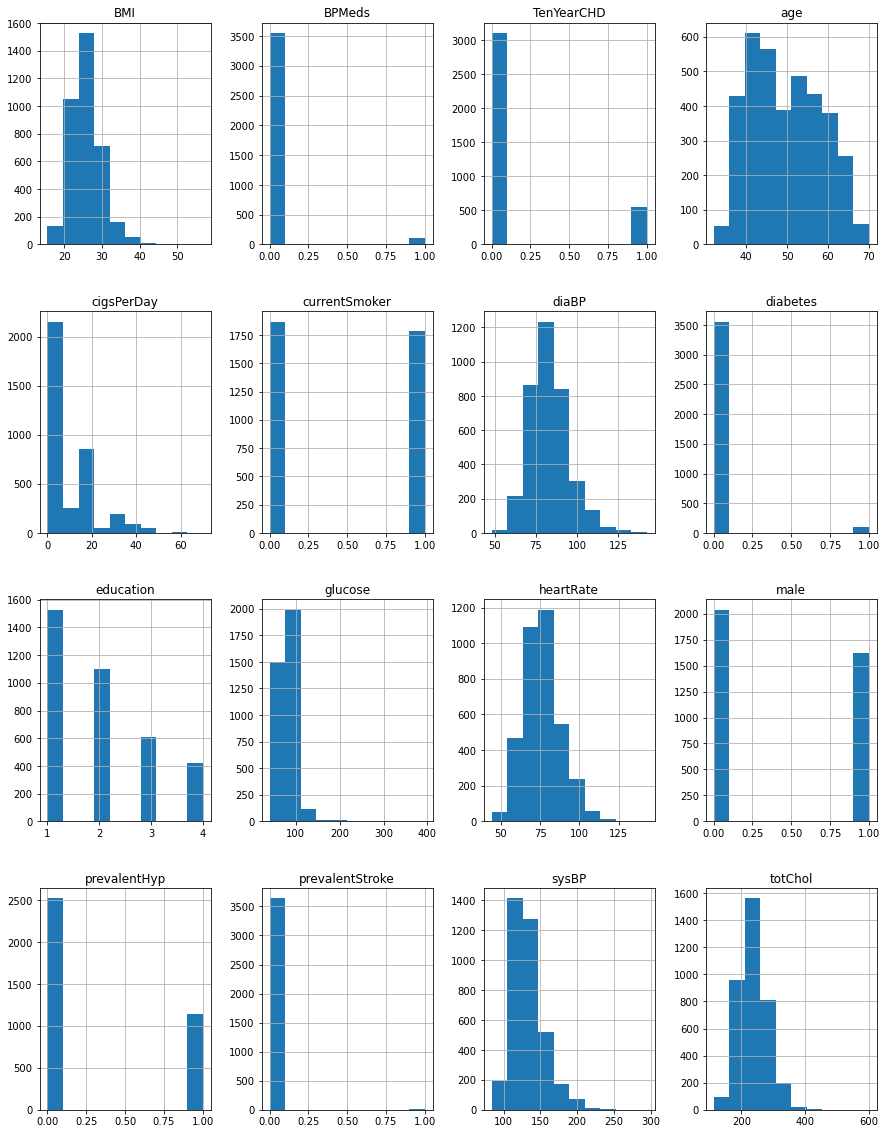

In [8]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dados.hist(ax=ax);

Verificando a correlação entre as variáveis

In [9]:
correlacao = dados.corr()

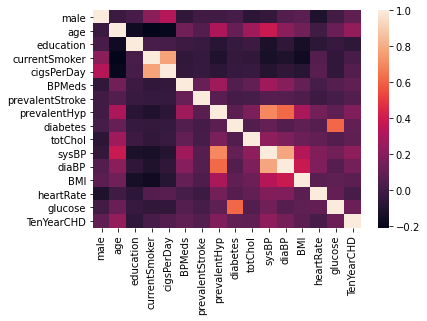

In [10]:
sns.heatmap(correlacao)

O grau de escolaridade da pessoa não é um fator importante uma vez que depende do entendimento do médico

In [11]:
dados = dados.drop('education',axis=1)

Normalizando os dados de algumas colunas

In [12]:
colunas = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
normalizador = MinMaxScaler(feature_range=(0,1)) 

In [15]:
dados[colunas] = normalizador.fit_transform(dados[colunas])

In [16]:
dados.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0.184211,0,0.000000,0.0,0,0,0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0,0.368421,0,0.000000,0.0,0,0,0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1,0.421053,1,0.285714,0.0,0,0,0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0,0.763158,1,0.428571,0.0,0,1,0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0,0.368421,1,0.328571,0.0,0,0,0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0


Verificando se a amostra está balanceada

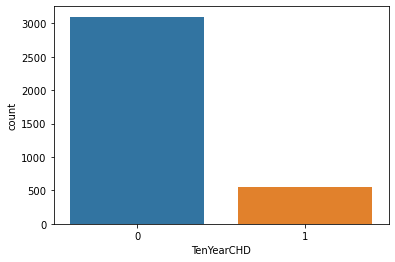

In [17]:
sns.countplot(x='TenYearCHD',data=dados)

Este gráfico nos diz que exitem muito menos casos de pessoas que poderão ter alguma doença no coração. Este fato nos diz que a amostra está totalmente desbalanceada.

Contagem de cada classe

In [18]:
contagem = dados['TenYearCHD'].value_counts()

In [19]:
print('Classe 0 = ',contagem[0])
print('Classe 1 = ',contagem[1])

Classe 0 =  3101
Classe 1 =  557


Para balancear a amostra iremos selecionar aleatoriamente 557 casos da classe 0

In [20]:
dados_1 = dados[dados['TenYearCHD']==1]
dados_0 = dados[dados['TenYearCHD']==0]

In [21]:
dados_0_novo = dados_0.sample(n=contagem[1],random_state=42)

Concatenando ambos os casos

In [22]:
dados = pd.concat([dados_0_novo,dados_1])

Verificando novamente a contagem de cada caso

In [23]:
contagem = dados['TenYearCHD'].value_counts()
print('Classe 0 = ',contagem[0])
print('Classe 1 = ',contagem[1])

Classe 0 =  557
Classe 1 =  557


Determinando as variáveis X e Y

In [24]:
X = dados.drop('TenYearCHD',axis=1).values
Y = dados['TenYearCHD'].values

Separando em amostra de treino e teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=0)

Criando modelo de regressão logística

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
modelo = LogisticRegression()

In [29]:
modelo.fit(X_treino,Y_treino)

LogisticRegression()

Realizando previsão na amostra de teste

In [30]:
Y_previsto = modelo.predict(X_teste)

Criando matriz de confusão

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm=confusion_matrix(Y_teste,Y_previsto)
cm

array([[ 84,  37],
       [ 51, 107]])

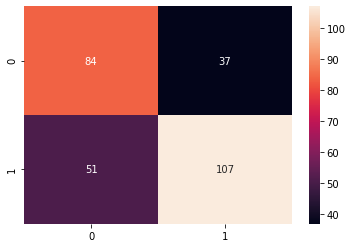

In [33]:
sns.heatmap(cm,annot=True, fmt="d")

Calculando as métricas do modelo

In [34]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

Relatório de classificação

In [35]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.69      0.66       121
           1       0.74      0.68      0.71       158

    accuracy                           0.68       279
   macro avg       0.68      0.69      0.68       279
weighted avg       0.69      0.68      0.69       279



F1-score

In [36]:
f1 = f1_score(Y_teste,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

F1 score = 70.86%


Precision score

In [37]:
precisao = precision_score(Y_teste,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 74.31%


Average precision score

In [38]:
avg_precision = average_precision_score(Y_teste,Y_previsto)
print("Averaged Precision score = {:0.2f}%".format(avg_precision*100))

Averaged Precision score = 68.60%


Recall score

In [39]:
rec = recall_score(Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 67.72%


Accuracy score

In [40]:
acc = accuracy_score(Y_teste,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 68.46%


O modelo atual não apresentou uma boa precisão indicando que este não seja o melhor modelo para esta situação devendo ser modificado (e.g KNN, SVM, Decision Tree, Random Forest) ou que os parâmetros do modelo de regressão logística precisam ser ajustados.

# Curva ROC

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:0.2f}%".format(roc_score*100))

ROC score = 68.57%


In [43]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

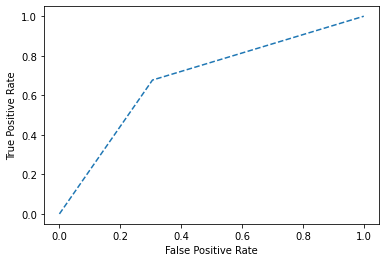

In [44]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Curva Precision-Recall

In [45]:
from sklearn.metrics import precision_recall_curve,auc

In [46]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_teste, Y_previsto)
lr_auc = auc(lr_recall, lr_precision)

In [47]:
print("AUC score = {:0.2f}%".format(lr_auc*100))

AUC score = 80.15%


Text(0, 0.5, 'Precision')

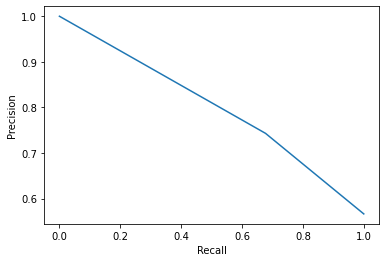

In [48]:
plt.plot(lr_recall, lr_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')